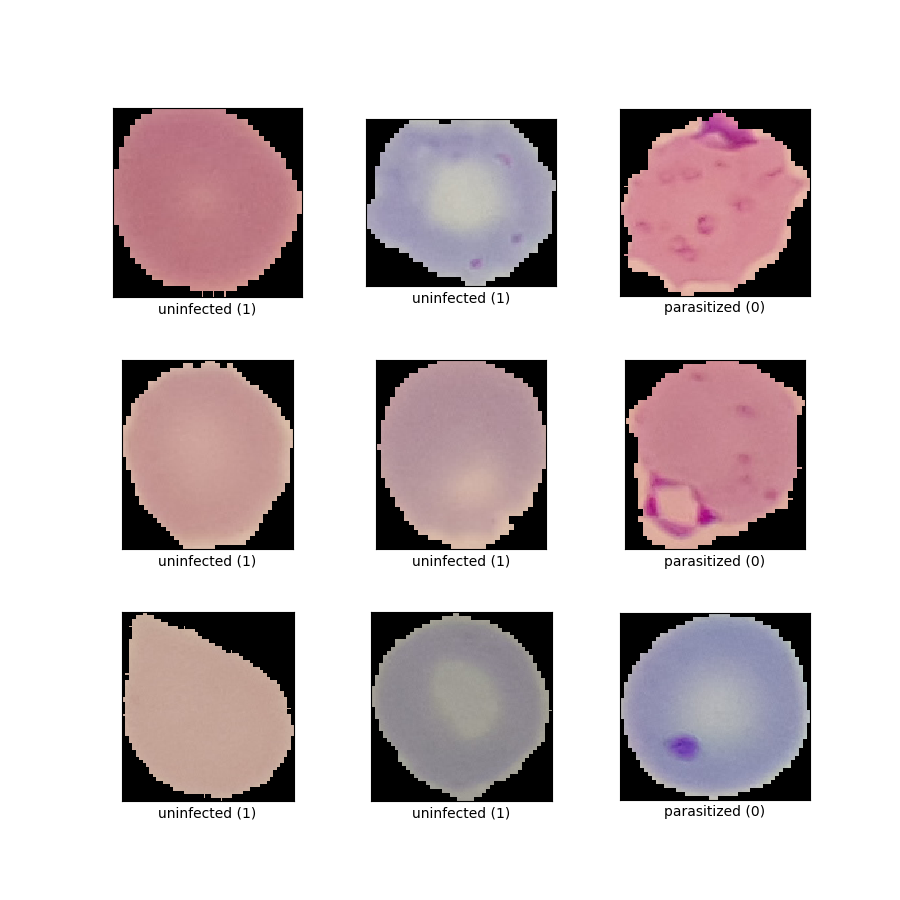

In [1]:
"""
Data from: https://lhncbc.nlm.nih.gov/LHC-publications/pubs/MalariaDatasets.html
"""


import numpy as np
import cv2
import os

np.random.seed(100)

from PIL import Image
import keras

os.environ['KERAS_BACKEND'] = 'tensorflow'


In [2]:
# CNN model

INPUT_SHAPE = (64, 64, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPool2D(pool_size=(2,2))(conv1)
norm1 = keras.layers.BatchNormalization(axis=-1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)

conv2 = keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPool2D(pool_size=(2,2))(conv2)
norm2 = keras.layers.BatchNormalization(axis=-1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis=-1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)

hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis=-1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(2, activation='sigmoid')(drop4)

model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

In [26]:
# prepare data

image_dir = 'D:\Programming\Python\Data\cell_images'
dataset = []
label = []

parasitised_img = os.listdir(image_dir + '\Parasitized')
for i, image_name in enumerate(parasitised_img):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + '\Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((64,64))
        dataset.append(np.array(image))
        label.append(0)


In [28]:

uninfected_img = os.listdir(image_dir + '\PNoninfected')
for i, image_name in enumerate(uninfected_img):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + '\PNoninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((64,64))
        dataset.append(np.array(image))
        label.append(1)
    

In [31]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train,X_test,y_train,y_test = train_test_split(dataset, to_categorical(np.array(label)),test_size=0.45,random_state=0)

# train
history = model.fit(np.array(X_train), y_train, batch_size=64, verbose=1, epochs=25, validation_split=0.1, shuffle=False)


Epoch 1/25
214/214 [==============================] - 32s 142ms/step - loss: 0.5307 - accuracy: 0.7715 - val_loss: 1.7366 - val_accuracy: 0.7084
Epoch 2/25
214/214 [==============================] - 30s 142ms/step - loss: 0.2704 - accuracy: 0.9021 - val_loss: 1.0590 - val_accuracy: 0.8133
Epoch 3/25
214/214 [==============================] - 30s 141ms/step - loss: 0.2221 - accuracy: 0.9168 - val_loss: 0.3829 - val_accuracy: 0.9030
Epoch 4/25
214/214 [==============================] - 33s 152ms/step - loss: 0.1964 - accuracy: 0.9284 - val_loss: 0.2214 - val_accuracy: 0.9314
Epoch 5/25
214/214 [==============================] - 31s 145ms/step - loss: 0.1801 - accuracy: 0.9339 - val_loss: 0.2102 - val_accuracy: 0.9301
Epoch 6/25
214/214 [==============================] - 31s 146ms/step - loss: 0.1639 - accuracy: 0.9408 - val_loss: 0.2307 - val_accuracy: 0.9334
Epoch 7/25
214/214 [==============================] - 31s 146ms/step - loss: 0.1421 - accuracy: 0.9468 - val_loss: 0.3136 - val_ac

388/388 [==============================] - 7s 19ms/step - loss: 0.2578 - accuracy: 0.9478
Test_Accuracy: 94.78%


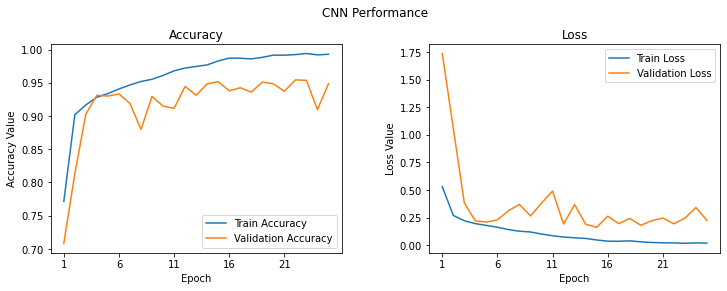

In [32]:
import matplotlib.pyplot as plt

print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

#Save the model
model.save('malaria_cnn.h5')
